___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# display all rows in the dataframe
pd.set_option('display.max_rows', None)

#display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [ ]:
churn_df = pd.read_csv("/content/drive/MyDrive/DL Assignment1/1-Churn_Modelling.csv")
churn_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [ ]:
churn_df.duplicated().sum()

0

In [ ]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#The previous cell displays that we have 3 objects columns, let's explore them
churn_df.describe(include="O").T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [ ]:
#we can drop the Surname, RowNumber, and CustomerId since they deliver nothing regarding the target column
churn_df.drop(["RowNumber", "CustomerId", "Surname"], inplace=True, axis=1)

In [ ]:
churn_df.shape

(10000, 11)

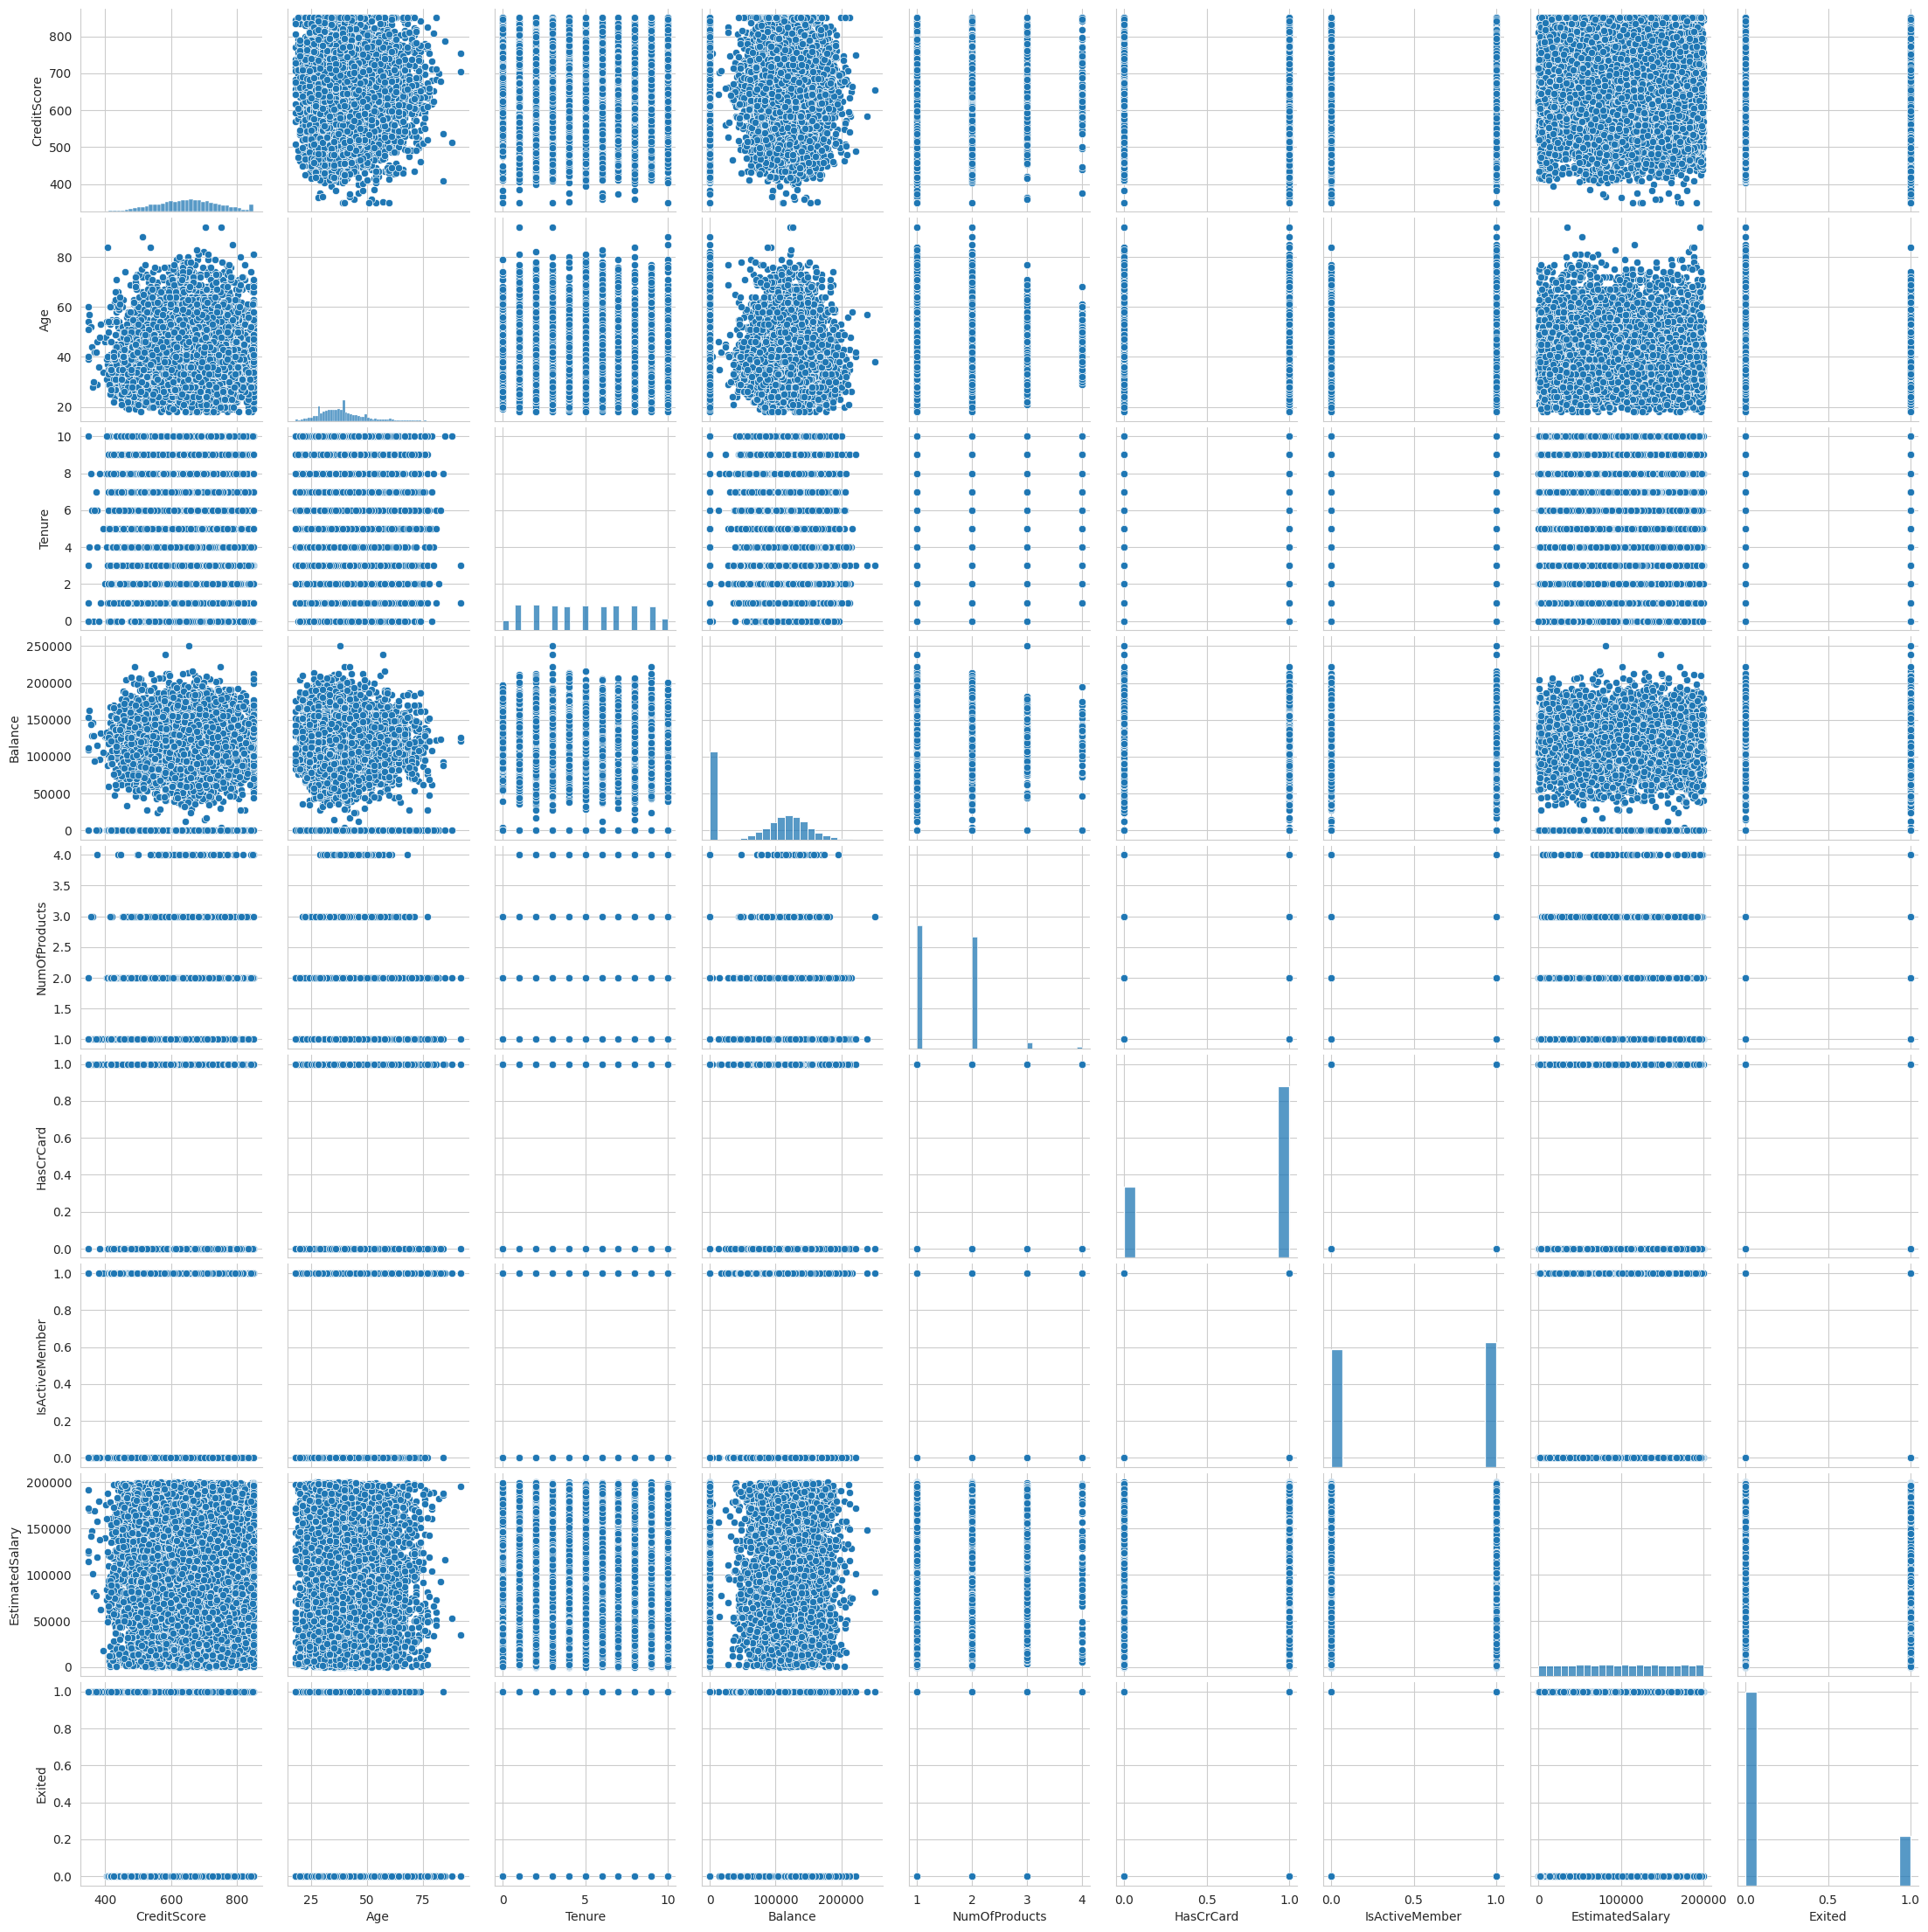

In [ ]:
#let's try pairplot to see the distribution and the correlations between the features and target
sns.pairplot(churn_df)
plt.show()

**The pairplot delivers nothing for this dataset, So let's try to take the main columns and investigate more with them.**
# NOTE:
I thought that in deep learning we don't need to do a lot of EDA and the "model" will do all of these rather than the human. Thus, I will try to choose some features for our understanding and investigate more with them. Also, when we have alot of features we can drop unnecessary features before feeding them to the model.

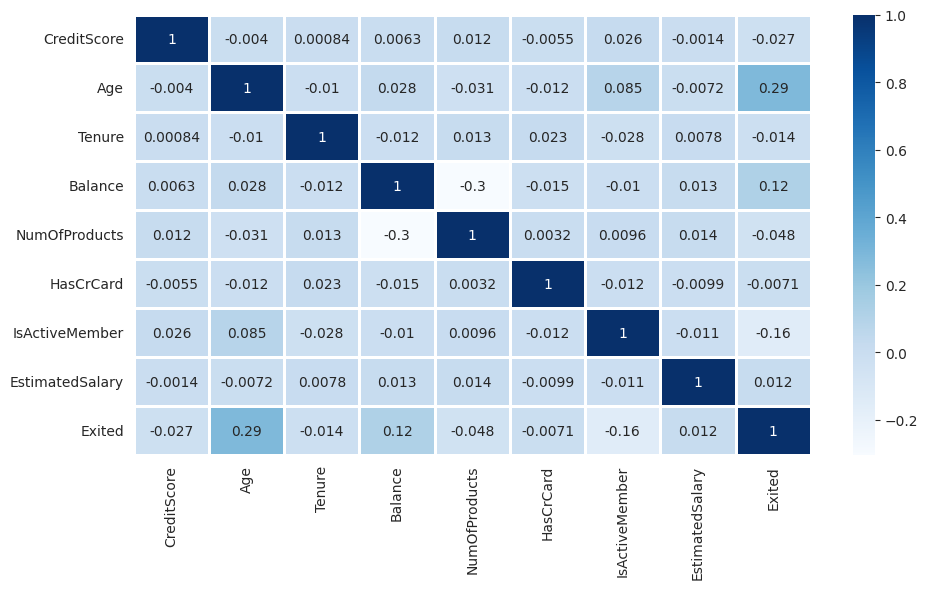

In [ ]:
sns.heatmap(churn_df.corr(),annot=True,linewidth =2 , cmap="Blues")
plt.tight_layout()
#we don't have any multicollinearity, and the Age column has the most corr with the target.

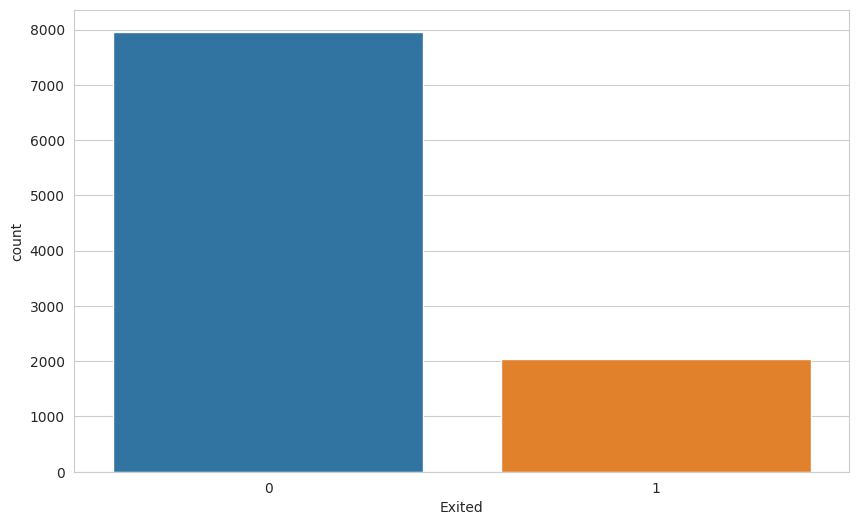

In [ ]:
#let's see the target column distribution "Is it balanced?"
sns.countplot(x=churn_df["Exited"])
plt.show()

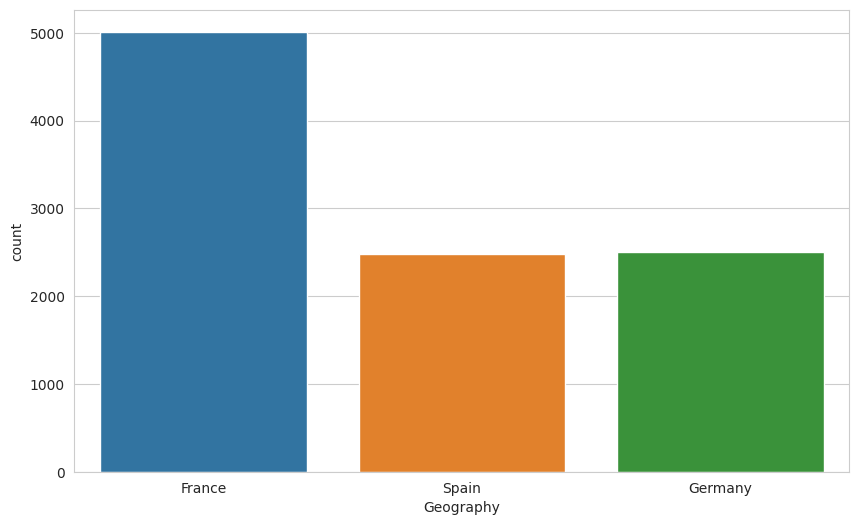

In [ ]:
#we have three unique values in Geography column lets display them
sns.countplot(data=churn_df, x='Geography')
plt.show()

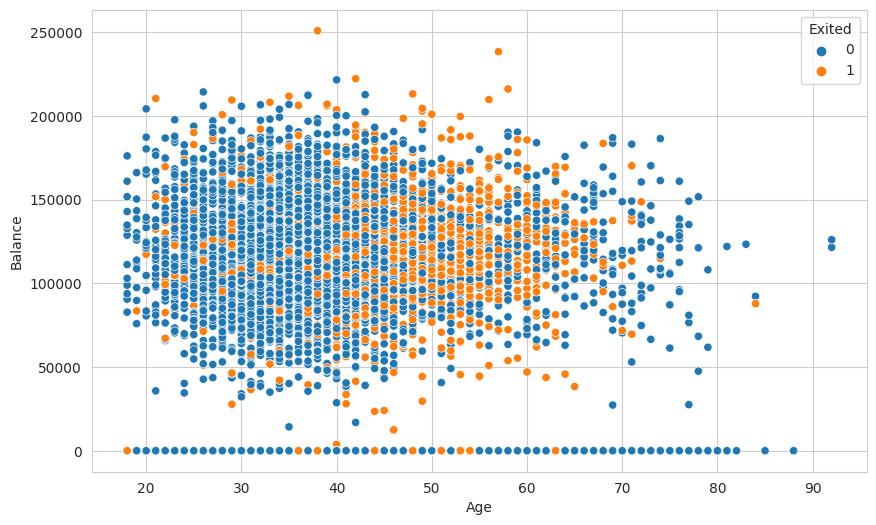

In [ ]:
sns.scatterplot(x="Age", y="Balance", data=churn_df, hue="Exited")
plt.show()
#Can we say "When the customer has more balance the probability of "churn" increases? and vice versa!"
#The Ages between (40-70) have more probability to churn!
#So we can't conclude a lot from this scatterplot like what we see in the following figure!

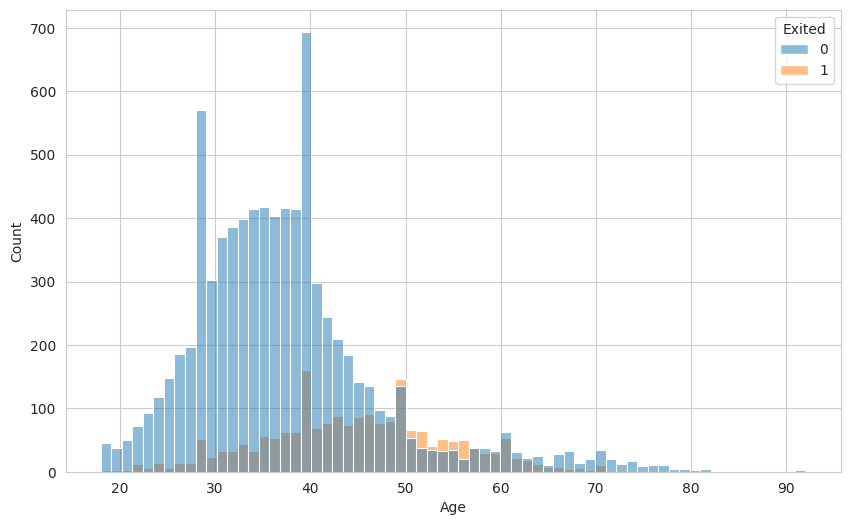

In [ ]:
sns.histplot(x="Age", hue="Exited", data=churn_df)
plt.show()
#The Exited column is not balanced, but we can indicate that the ages between (30-60) have more probability of churn.

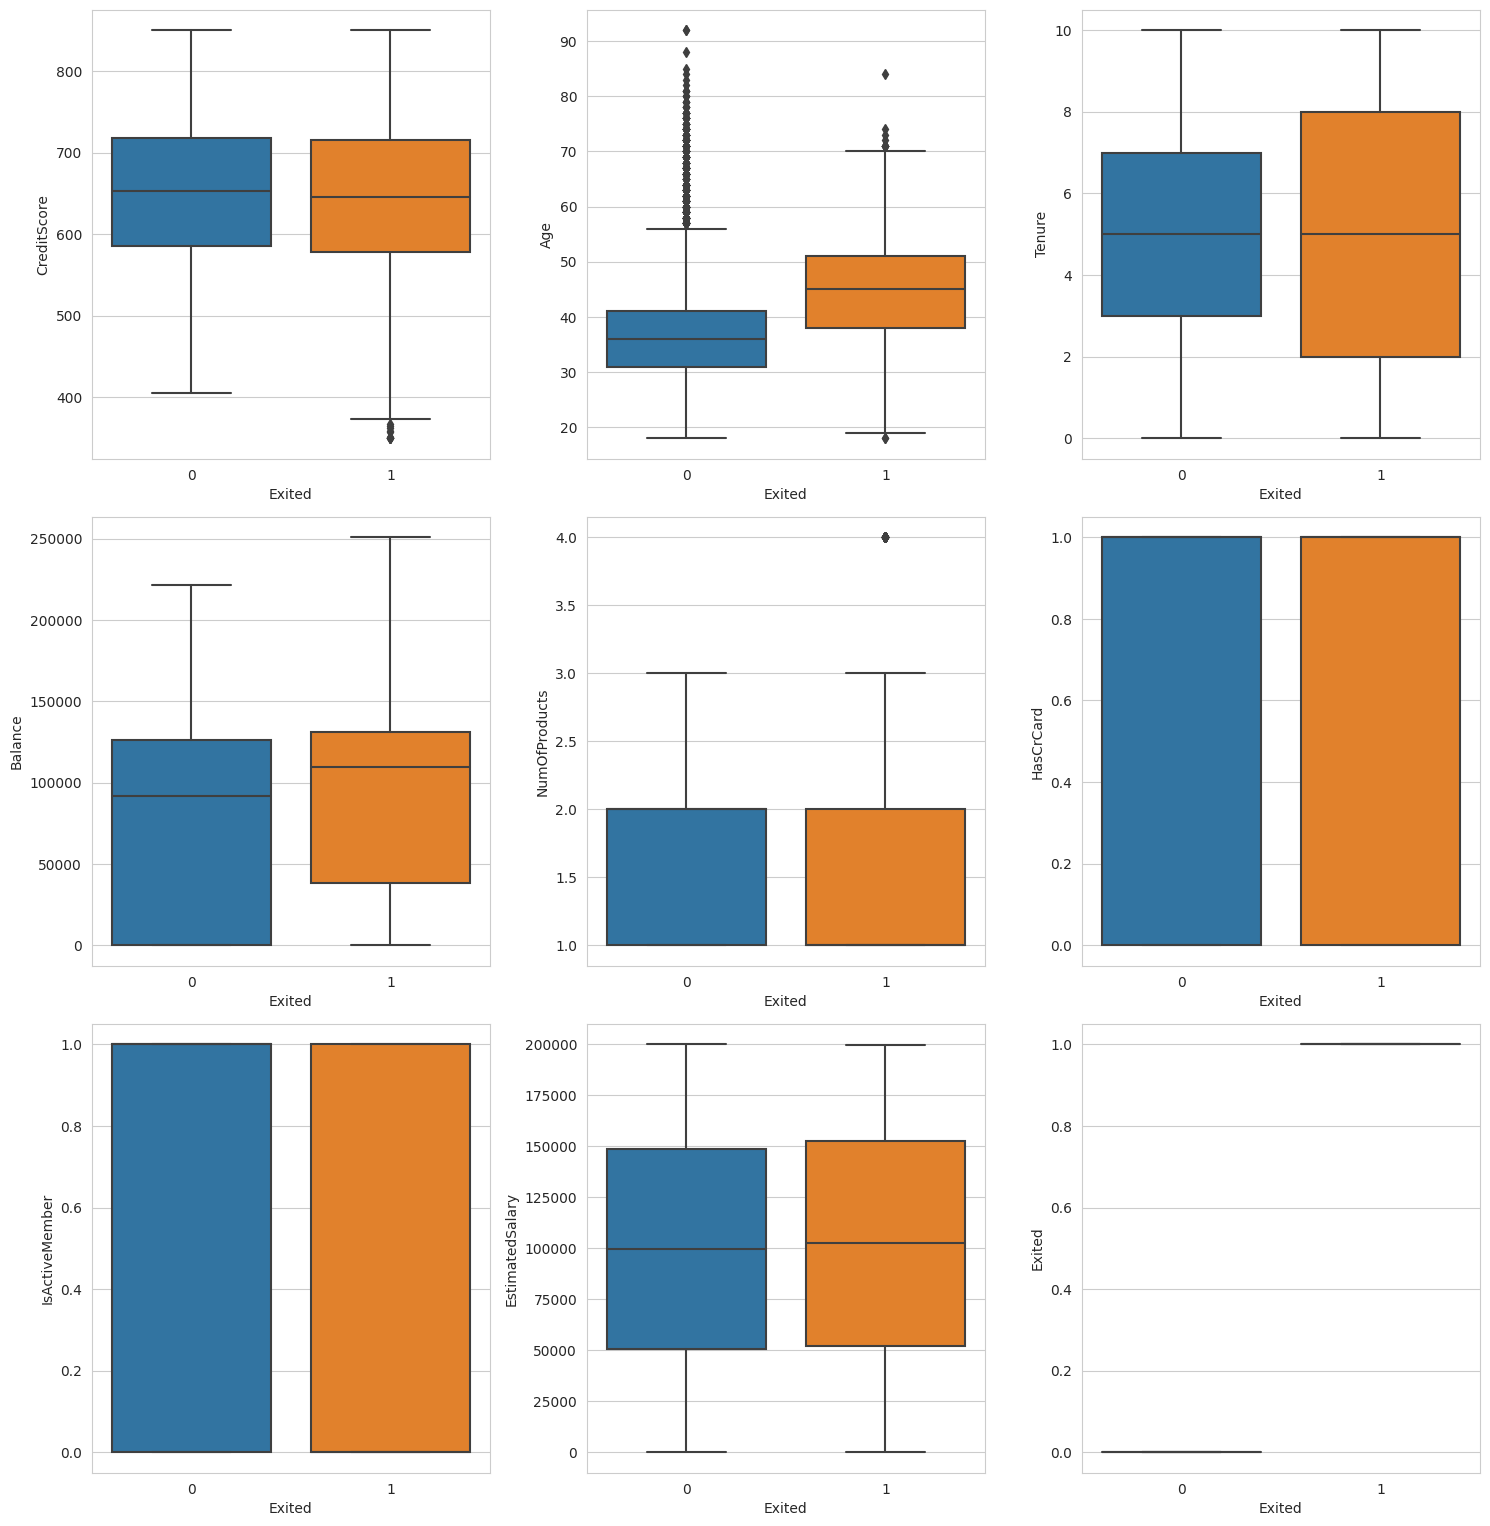

In [ ]:
#let's display the outliers
fig = plt.figure(figsize=(15,20))

for i, col in enumerate(churn_df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=churn_df[col], data=churn_df)

plt.tight_layout();

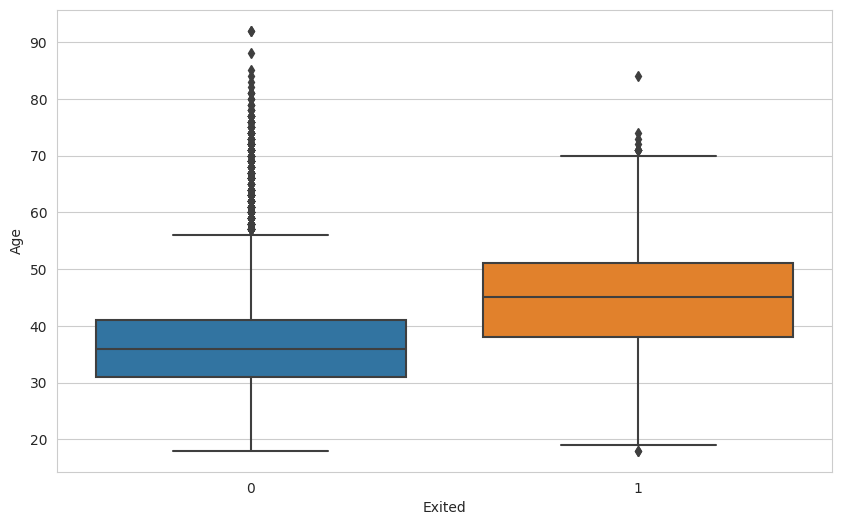

In [ ]:
#let's see the outliers in the Age columns
sns.boxplot(x="Exited", y="Age", data=churn_df)
plt.show()

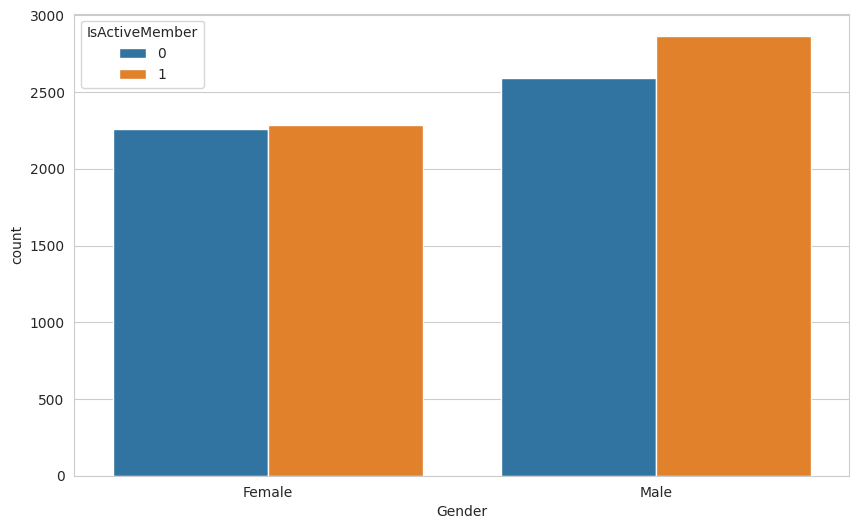

In [ ]:
#disply the active members' based on gender
sns.countplot(x='Gender', hue='IsActiveMember', data = churn_df)
plt.show()

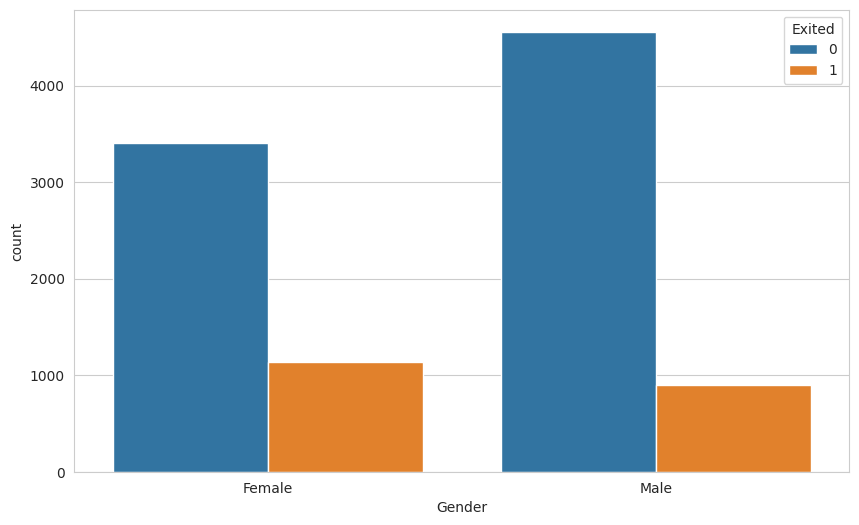

In [ ]:
#disply the exited members' based on gender
sns.countplot(x='Gender', hue='Exited', data = churn_df)
plt.show()

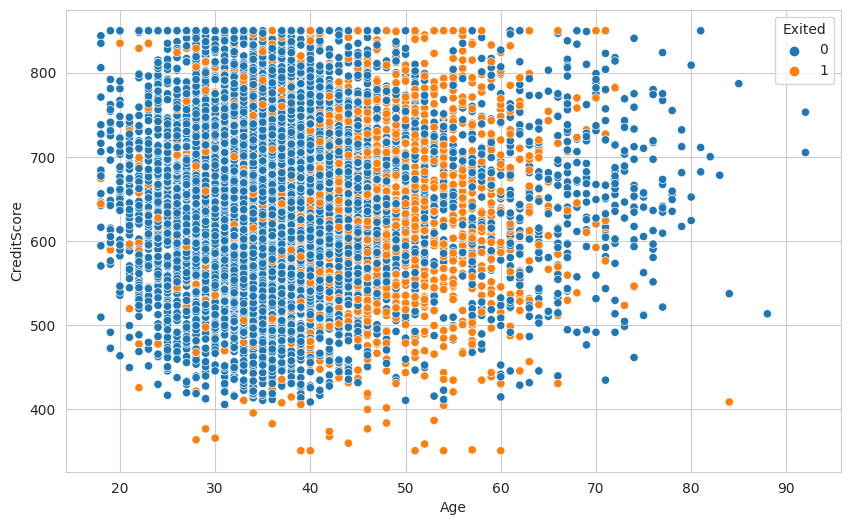

In [ ]:
#disply the credit score with age
#we can indicate that the people with lower cridite scores have a more higher probability of churn
sns.scatterplot(x="Age", y="CreditScore", data=churn_df, hue="Exited")
plt.show()

In [ ]:
churn_df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

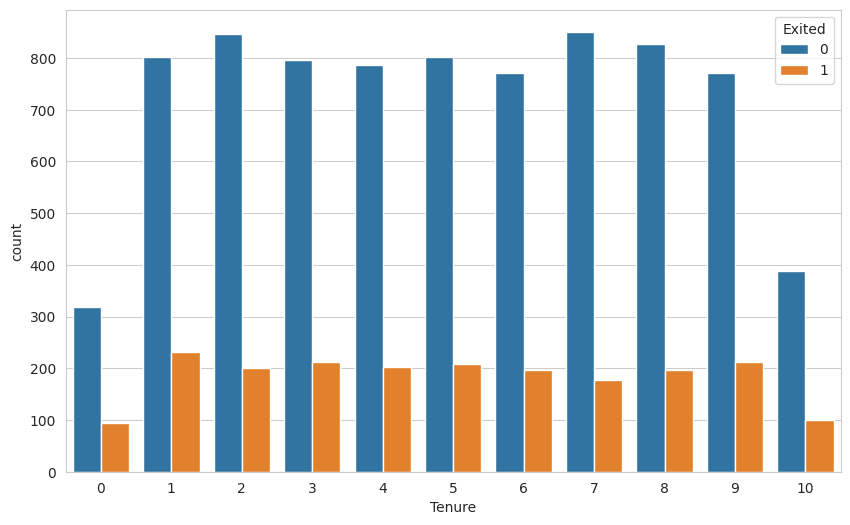

In [ ]:
#I want to display the number of years for which the customer has been with the bank with the exited column, but it delivers nothing!!
sns.countplot(x='Tenure', hue='Exited', data = churn_df)
plt.show()

In [ ]:
churn_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

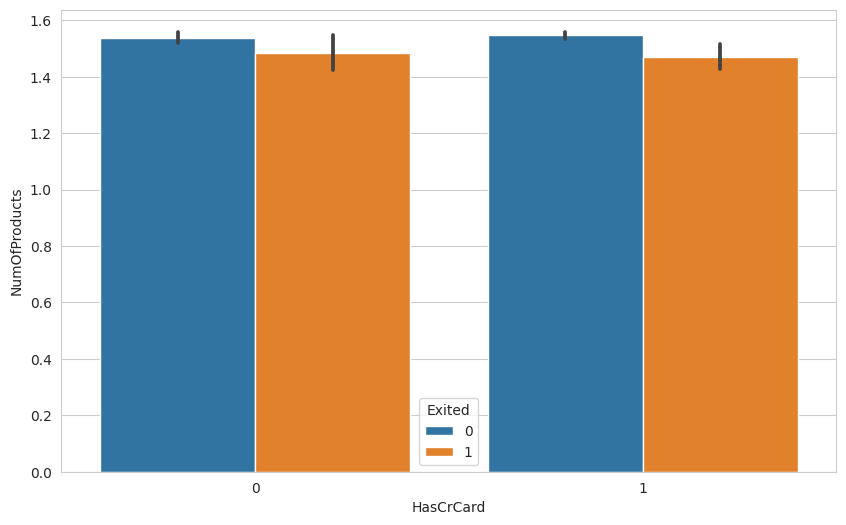

In [ ]:
sns.barplot(x="HasCrCard", y="NumOfProducts", data=churn_df, hue="Exited")
plt.show()
#from this figure I thought that I could indicate something like "they have a card so that indicates they will not churn
#or higher num of products that means they are with the bank"!
#But in these two cases we have the same for 0 and 1 in exited column!

In [ ]:
#Convert categorical values to dummies
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_col = ['Geography', 'Gender']

In [ ]:
from sklearn.compose import make_column_transformer
encoded_columns = encoder.fit_transform(churn_df[cat_col])

In [ ]:
names_of_encoded_col = []
for i, column in enumerate(cat_col):
    categories = encoder.categories_[i]
    names_of_encoded_col.extend([column + '_' + str(category) for category in categories])
churn_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2      0.000              1   
1          608     Spain  Female   41       1  83807.860              1   
2          502    France  Female   42       8 159660.800              3   
3          699    France  Female   39       1      0.000              2   
4          850     Spain  Female   43       2 125510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1       101348.880       1  
1          0               1       112542.580       0  
2          1               0       113931.570       1  
3          0               0        93826.630       0  
4          1               1        79084.100       0

In [ ]:
churn_df.drop(cat_col, axis=1, inplace=True)
churn_df[names_of_encoded_col] = encoded_columns
churn_df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1       101348.880       1             1.000   
1               1       112542.580       0             0.000   
2               0       113931.570       1             1.000   
3               0        93826.630       0             1.000   
4               1        79084.100       0             0.000   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0              0.000            0.000          1.000        0.000  
1              0.000            1.000          1.000        0.000  
2              0.000            0.000          1.000        0.000  
3              0.000            0.000          1.000        0.000  
4              0.000            1.000          1.000        0.000

In [ ]:
churn_df.shape

(10000, 14)

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
X = churn_df.drop("Exited", axis =1)
y = churn_df["Exited"]

In [ ]:
#After describing the data we can say it needs to be scale since it is not in the same range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.shape

(8000, 13)

In [ ]:
X_test.shape

(2000, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Sequential()

model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(18, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
213/213 [==============================] - 5s 5ms/step - loss: 0.4769 - recall: 0.1198 - val_loss: 0.3935 - val_recall: 0.3471
Epoch 2/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.3690 - recall: 0.4215 - val_loss: 0.3569 - val_recall: 0.4504
Epoch 3/1000
213/213 [==============================] - 1s 6ms/step - loss: 0.3470 - recall: 0.4800 - val_loss: 0.3505 - val_recall: 0.4339
Epoch 4/1000
213/213 [==============================] - 1s 6ms/step - loss: 0.3372 - recall: 0.4864 - val_loss: 0.3497 - val_recall: 0.4463
Epoch 5/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.3319 - recall: 0.4936 - val_loss: 0.3447 - val_recall: 0.4339
Epoch 6/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.3291 - recall: 0.4986 - val_loss: 0.3470 - val_recall: 0.4669
Epoch 7/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.3265 - recall: 0.5136 - val_loss: 0.3466 - val_recall: 0.4298
Epoch 8/1000
213/213

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 18)                594       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 3589 (14.02 KB)
Trainable params: 3589 (14.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
his_df = pd.DataFrame(model.history.history)
his_df.head()

loss  recall  val_loss  val_recall
0 0.477   0.120     0.393       0.347
1 0.369   0.422     0.357       0.450
2 0.347   0.480     0.350       0.434
3 0.337   0.486     0.350       0.446
4 0.332   0.494     0.345       0.434

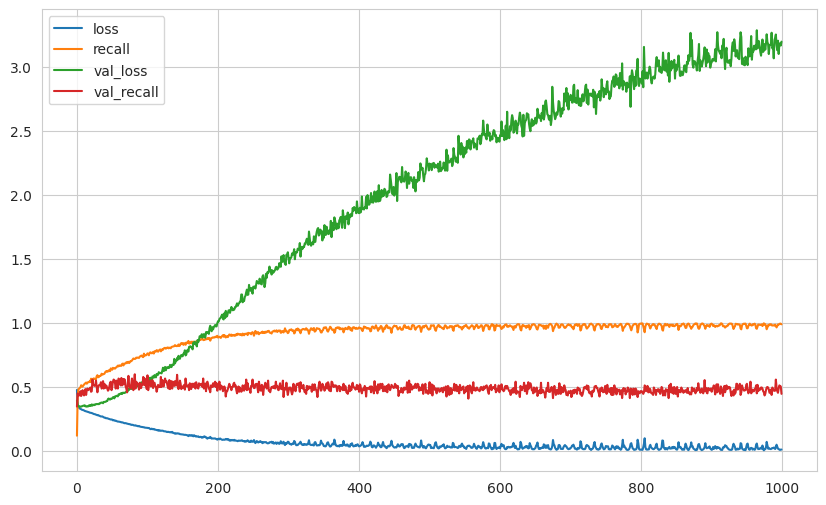

In [ ]:
his_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[3.4173500537872314, 0.48600509762763977]

In [ ]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  3.4173500537872314
recall:  0.48600509762763977


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1424  183]
 [ 202  191]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1607
           1       0.51      0.49      0.50       393

    accuracy                           0.81      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.81      0.81      2000



63/63 [==============================] - 0s 2ms/step


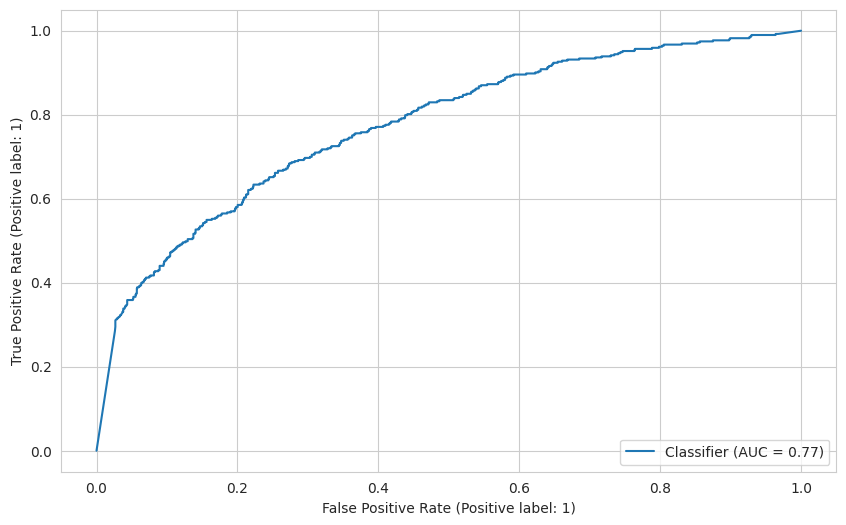

In [ ]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
#y_train.shape

In [ ]:
#Count the number of samples for each class
#]class_counts = np.bincount(y_train)
#class_counts

In [ ]:
# Calculate class weights based on the class distribution
#class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}
#class_weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights using compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

class_weights_dict

{0: 0.6293266205160478, 1: 2.4330900243309004}

In [ ]:
churn_df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.

#weight_for_0 = (1 / 7963) * ((7963+2037) / 2.0)
#weight_for_1 = (1 / 7963) * ((7963+2037) / 2.0)

#here I tried to lower class 1 to have the same weight as class 0!
#class_weight = {0: weight_for_0, 1: weight_for_1}

#print('Weight for class 0: {:.2f}'.format(weight_for_0))
#print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 0.63


### Create The Model

In [ ]:
model_weighted = Sequential()

model_weighted.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model_weighted.add(Dense(32, activation="relu"))
model_weighted.add(Dense(18, activation="relu"))
model_weighted.add(Dense(1, activation="sigmoid"))

model_weighted.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
# Fit the model with class weights
#class_weights = {class_idx: weight for class_idx, weight in enumerate(class_weights)}
model_weighted.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, epochs=1000, verbose=1,  class_weight=class_weights_dict
)

Epoch 1/1000
213/213 [==============================] - 3s 6ms/step - loss: 0.5991 - recall: 0.7218 - val_loss: 0.5281 - val_recall: 0.7479
Epoch 2/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4907 - recall: 0.7518 - val_loss: 0.4379 - val_recall: 0.7107
Epoch 3/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4643 - recall: 0.7653 - val_loss: 0.5013 - val_recall: 0.7975
Epoch 4/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4542 - recall: 0.7682 - val_loss: 0.4180 - val_recall: 0.7355
Epoch 5/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4496 - recall: 0.7718 - val_loss: 0.4374 - val_recall: 0.7314
Epoch 6/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4426 - recall: 0.7746 - val_loss: 0.4386 - val_recall: 0.7355
Epoch 7/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4380 - recall: 0.7796 - val_loss: 0.4388 - val_recall: 0.7438
Epoch 8/1000
213/213

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
his_df_w = pd.DataFrame(model_weighted.history.history)
his_df_w.head()

loss  recall  val_loss  val_recall
0 0.599   0.722     0.528       0.748
1 0.491   0.752     0.438       0.711
2 0.464   0.765     0.501       0.798
3 0.454   0.768     0.418       0.736
4 0.450   0.772     0.437       0.731

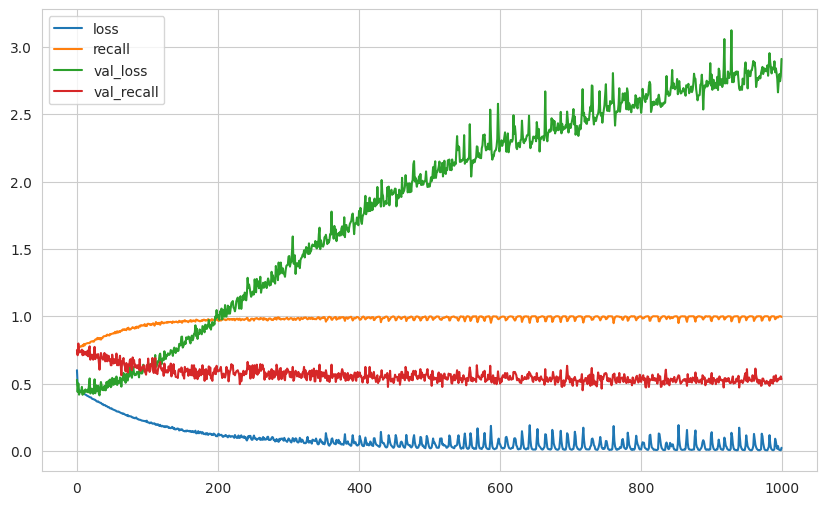

In [ ]:
his_df_w.plot()
plt.show()

In [ ]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[3.104369640350342, 0.5267175436019897]

In [ ]:
loss, recall = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  3.104369640350342
recall:  0.5267175436019897


In [ ]:
y_pred = model_weighted.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1370  237]
 [ 186  207]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.47      0.53      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [ ]:
y_t_pre = model_weighted.predict(X_train) > 0.5

250/250 [==============================] - 0s 2ms/step


In [ ]:
#To make sure that the class_wieght is working we can see the train observations here!
#also we can say that we have on overfitting here..
print(confusion_matrix(y_train, y_t_pre))
print(classification_report(y_train, y_t_pre))

[[6097  259]
 [ 148 1496]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6356
           1       0.85      0.91      0.88      1644

    accuracy                           0.95      8000
   macro avg       0.91      0.93      0.92      8000
weighted avg       0.95      0.95      0.95      8000



63/63 [==============================] - 0s 2ms/step


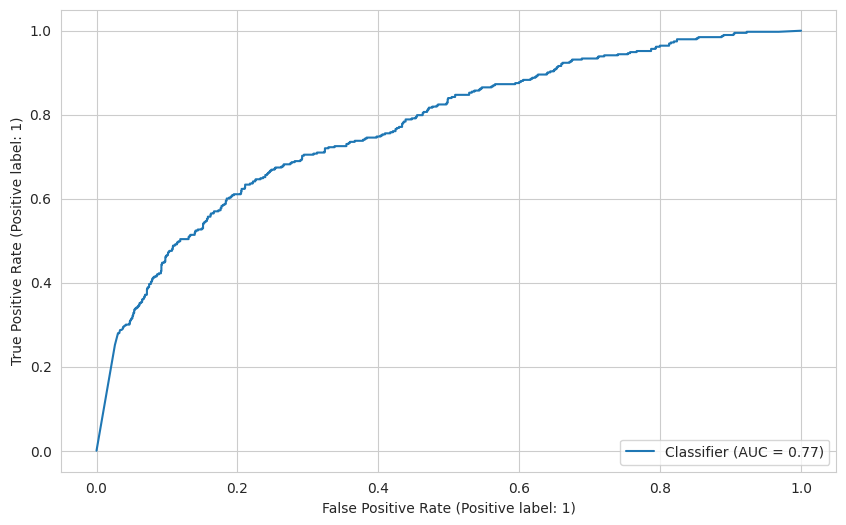

In [ ]:
y_pred_proba = model_weighted.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

model_weighted_lr = Sequential()

model_weighted_lr.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model_weighted_lr.add(Dense(32, activation="relu"))
model_weighted_lr.add(Dense(18, activation="relu"))
model_weighted_lr.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model_weighted_lr.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
model_weighted_lr.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, epochs=1000, verbose=1,  class_weight=class_weights_dict
)

Epoch 1/1000
213/213 [==============================] - 2s 5ms/step - loss: 0.5570 - recall: 0.7111 - val_loss: 0.4315 - val_recall: 0.6818
Epoch 2/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4835 - recall: 0.7489 - val_loss: 0.4443 - val_recall: 0.7273
Epoch 3/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4673 - recall: 0.7568 - val_loss: 0.4710 - val_recall: 0.7645
Epoch 4/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4582 - recall: 0.7646 - val_loss: 0.4713 - val_recall: 0.7397
Epoch 5/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4508 - recall: 0.7639 - val_loss: 0.4976 - val_recall: 0.7851
Epoch 6/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4477 - recall: 0.7682 - val_loss: 0.4145 - val_recall: 0.7025
Epoch 7/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4450 - recall: 0.7874 - val_loss: 0.5226 - val_recall: 0.7645
Epoch 8/1000
213/213

In [ ]:
his_df_w_lr= pd.DataFrame(model_weighted_lr.history.history)
his_df_w_lr.head()

loss  recall  val_loss  val_recall
0 0.557   0.711     0.432       0.682
1 0.484   0.749     0.444       0.727
2 0.467   0.757     0.471       0.764
3 0.458   0.765     0.471       0.740
4 0.451   0.764     0.498       0.785

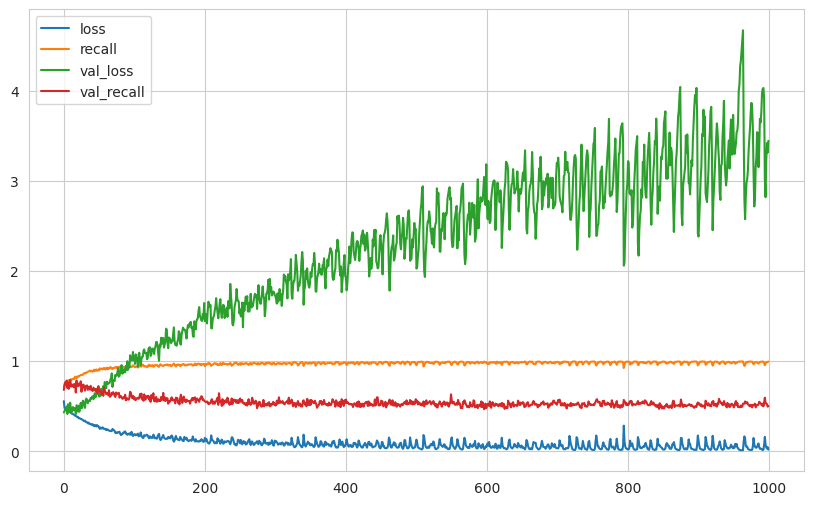

In [ ]:
his_df_w_lr.plot()
plt.show()

In [ ]:
model_weighted_lr.evaluate(X_test, y_test, verbose=0)

[3.6320881843566895, 0.5114504098892212]

In [ ]:
loss, accuracy = model_weighted_lr.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  3.6320881843566895
accuracy:  0.5114504098892212


In [ ]:
y_pred = model_weighted_lr.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1420  187]
 [ 192  201]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1607
           1       0.52      0.51      0.51       393

    accuracy                           0.81      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.81      0.81      0.81      2000



63/63 [==============================] - 0s 3ms/step


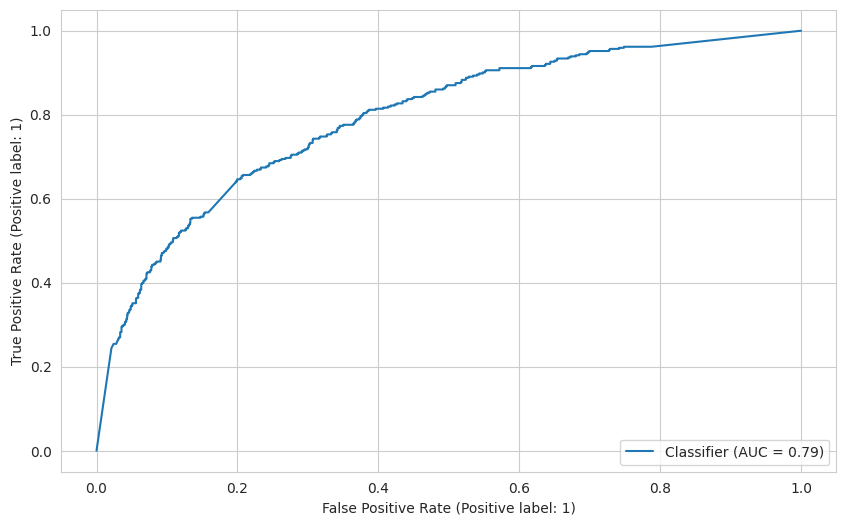

In [ ]:
y_pred_proba = model_weighted_lr.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Dropout Layer

In [ ]:
#we have an obvious overfitting in the model, so I will implement the dropout to fix that
from tensorflow.keras.layers import Dropout

model_d = Sequential()

model_d.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model_d.add(Dropout(0.5))

model_d.add(Dense(32, activation="relu"))
model_d.add(Dropout(0.5))

model_d.add(Dense(18, activation="relu"))
model_d.add(Dropout(0.5))

model_d.add(Dense(1, activation="sigmoid"))


model_d.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
model_d.fit(
    x=X_train, y=y_train,
    validation_split=0.15,
    batch_size=32,
    epochs=1000,
    verbose=1,
    class_weight=class_weights_dict
)

Epoch 1/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4409 - recall: 0.7796 - val_loss: 0.4177 - val_recall: 0.7025
Epoch 2/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4488 - recall: 0.7682 - val_loss: 0.4301 - val_recall: 0.7149
Epoch 3/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4398 - recall: 0.7746 - val_loss: 0.4256 - val_recall: 0.7066
Epoch 4/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4388 - recall: 0.7653 - val_loss: 0.4110 - val_recall: 0.7025
Epoch 5/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4448 - recall: 0.7589 - val_loss: 0.4196 - val_recall: 0.7025
Epoch 6/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4392 - recall: 0.7625 - val_loss: 0.4373 - val_recall: 0.7231
Epoch 7/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4365 - recall: 0.7675 - val_loss: 0.4214 - val_recall: 0.7107
Epoch 8/1000
213/213

<Axes: >

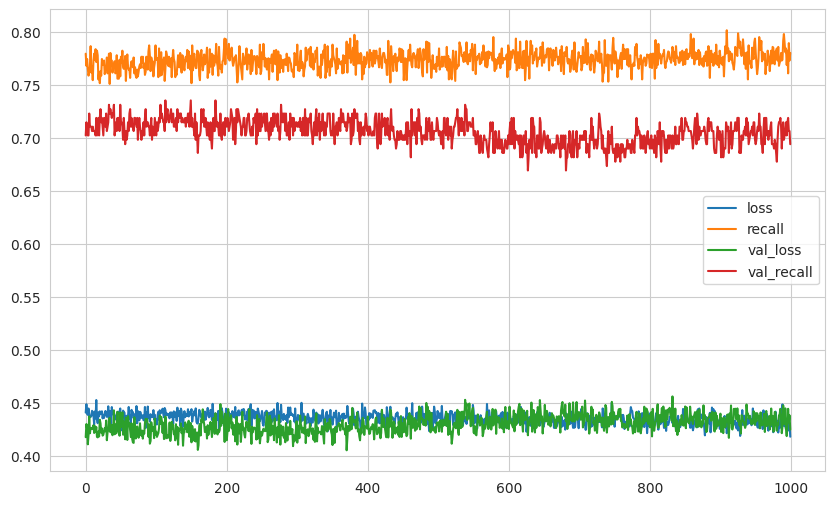

In [ ]:
loss_df_d = pd.DataFrame(model_d.history.history)
loss_df_d.plot()

In [ ]:
loss, recall = model_d.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4239446818828583
recall:  0.6972010135650635


In [ ]:
y_pred = model_d.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1312  295]
 [ 119  274]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1607
           1       0.48      0.70      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.81      2000



63/63 [==============================] - 0s 2ms/step


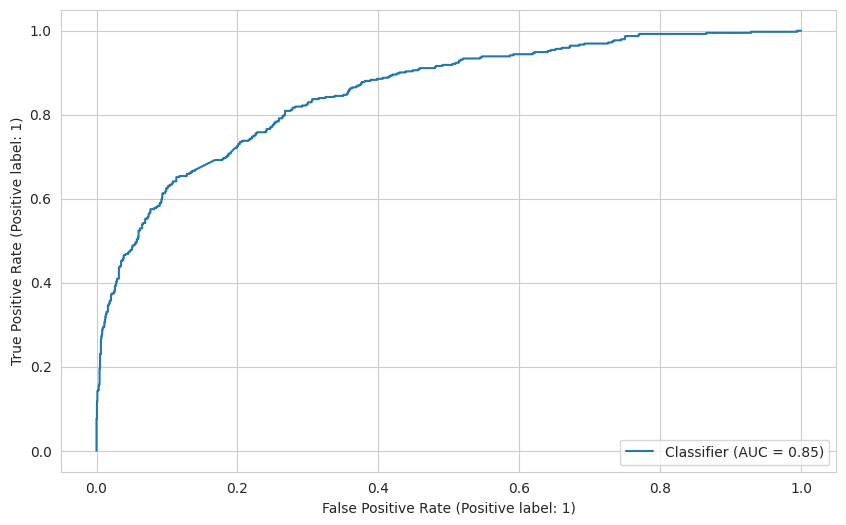

In [ ]:
y_pred_proba = model_d.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add EarlyStopping

#### Monitor the "val_loss" as metric

In [ ]:
model_E = Sequential()

model_E.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model_E.add(Dense(32, activation="relu"))
model_E.add(Dense(18, activation="relu"))
model_E.add(Dense(1, activation="sigmoid"))

model_E.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
#Let's try to address the overfitting with EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=15,
    restore_best_weights=True
)

In [ ]:
model_E.fit(
    x=X_train,
    y=y_train,
    validation_split=0.15,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
)

Epoch 1/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4148 - recall: 0.7981 - val_loss: 0.4245 - val_recall: 0.7273
Epoch 2/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4136 - recall: 0.7924 - val_loss: 0.4770 - val_recall: 0.7851
Epoch 3/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4111 - recall: 0.8003 - val_loss: 0.5249 - val_recall: 0.8017
Epoch 4/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4072 - recall: 0.8017 - val_loss: 0.5193 - val_recall: 0.8017
Epoch 5/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4039 - recall: 0.8039 - val_loss: 0.4615 - val_recall: 0.7355
Epoch 6/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.4034 - recall: 0.8039 - val_loss: 0.4482 - val_recall: 0.7107
Epoch 7/1000
213/213 [==============================] - 1s 5ms/step - loss: 0.4017 - recall: 0.8024 - val_loss: 0.4441 - val_recall: 0.6983
Epoch 8/1000
213/213

<Axes: >

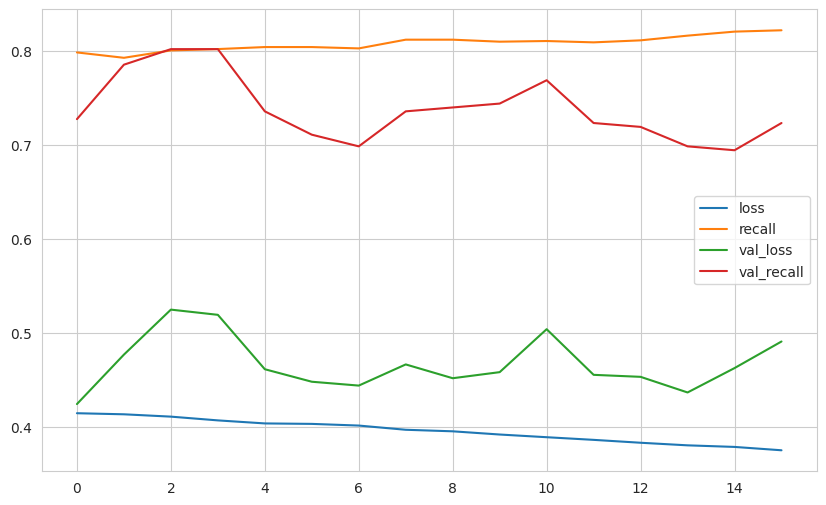

In [ ]:
loss_df_E = pd.DataFrame(model_E.history.history)
loss_df_E.plot()

In [ ]:
loss, recall = model_E.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.436665803194046
recall:  0.7302799224853516


In [ ]:
y_pred = model_E.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1313  294]
 [ 106  287]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1607
           1       0.49      0.73      0.59       393

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



63/63 [==============================] - 0s 2ms/step


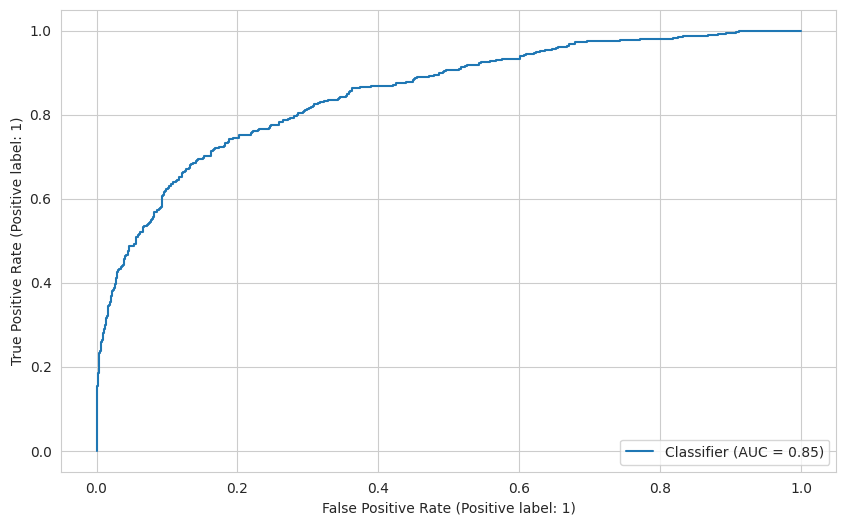

In [ ]:
y_pred_proba = model_E.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

#### Monitor the "val_recall" as metric

In [ ]:
model_E_r = Sequential()

model_E_r.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model_E_r.add(Dense(32, activation="relu"))
model_E_r.add(Dense(18, activation="relu"))
model_E_r.add(Dense(1, activation="sigmoid"))

model_E_r.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
#Let's try to address the overfitting with EarlyStopping
early_stop = EarlyStopping(
    monitor="val_recall",
    mode="min",
    verbose=1,
    patience=15,
    restore_best_weights=True
)

In [ ]:
model_E_r.fit(
    x=X_train,
    y=y_train,
    validation_split=0.15,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
213/213 [==============================] - 2s 5ms/step - loss: 0.4432 - recall: 0.1462 - val_loss: 0.3779 - val_recall: 0.2934
Epoch 2/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.3688 - recall: 0.4116 - val_loss: 0.3464 - val_recall: 0.4215
Epoch 3/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.3514 - recall: 0.4636 - val_loss: 0.3444 - val_recall: 0.3926
Epoch 4/1000
213/213 [==============================] - 1s 4ms/step - loss: 0.3455 - recall: 0.4529 - val_loss: 0.3457 - val_recall: 0.4132
Epoch 5/1000
213/213 [==============================] - 1s 6ms/step - loss: 0.3393 - recall: 0.4793 - val_loss: 0.3442 - val_recall: 0.4215
Epoch 6/1000
213/213 [==============================] - 1s 6ms/step - loss: 0.3346 - recall: 0.4964 - val_loss: 0.3421 - val_recall: 0.4132
Epoch 7/1000
213/213 [==============================] - 1s 6ms/step - loss: 0.3315 - recall: 0.4829 - val_loss: 0.3389 - val_recall: 0.4463
Epoch 8/1000
213/213

<Axes: >

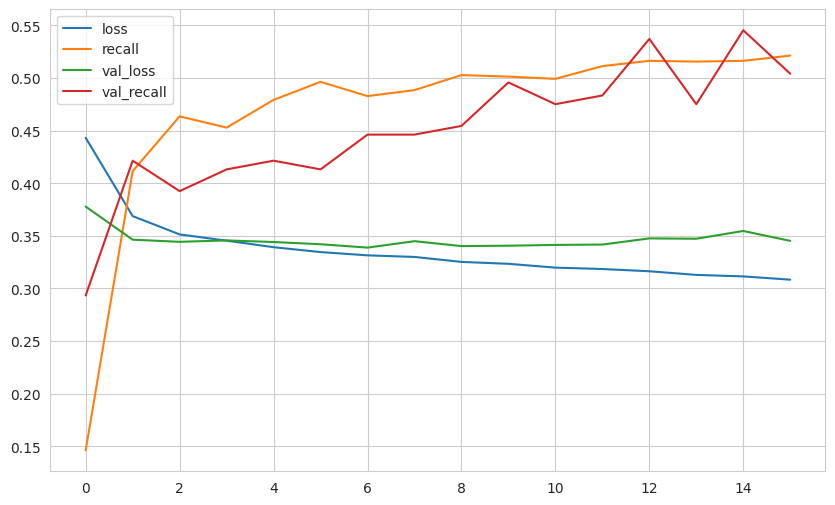

In [ ]:
loss_df_E_r = pd.DataFrame(model_E_r.history.history)
loss_df_E_r.plot()

In [ ]:
loss, recall = model_E_r.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.37723779678344727
recall:  0.24936386942863464


In [ ]:
y_pred = model_E_r.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1574   33]
 [ 295   98]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1607
           1       0.75      0.25      0.37       393

    accuracy                           0.84      2000
   macro avg       0.80      0.61      0.64      2000
weighted avg       0.82      0.84      0.80      2000



63/63 [==============================] - 0s 2ms/step


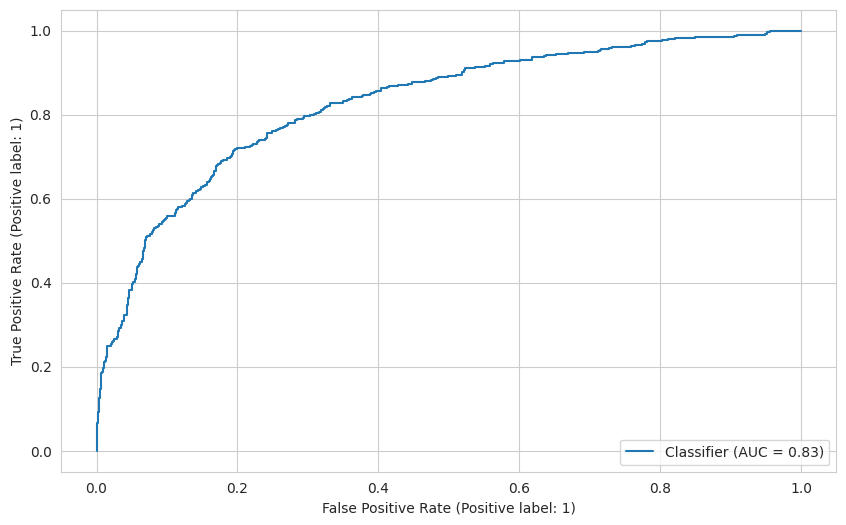

In [ ]:
y_pred_proba = model_E_r.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Optuna

In [ ]:
!pip install optuna

*I used more than one method to enhance the model performance such as: dropout, increase lr, etc. on the other hand, there is a good method to choose all of these things rather than us which is optuna (similar to Gridsearch in ML)*

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)

    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 11:14:31,735] A new study created in memory with name: no-name-4686fe65-dac8-4c32-a3f0-08905dc3f210


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 11:14:53,956] Trial 0 finished with value: 0.015267175622284412 and parameters: {'n_units1': 33, 'n_units2': 40, 'n_units3': 96, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.008591160536892238, 'w0': 2.390345786895594, 'w1': 0.040864494689559605}. Best is trial 0 with value: 0.015267175622284412.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 11:15:04,951] Trial 1 finished with value: 0.6539440155029297 and parameters: {'n_units1': 67, 'n_units2': 29, 'n_units3': 53, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.015624333514875613, 'w0': 0.39984293528918835, 'w1': 1.516128557382396}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 11:15:16,475] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 61, 'n_units2': 11, 'n_units3': 71, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 3.509816683430379e-05, 'w0': 2.2123213318758443, 'w1': 0.01474739909050876}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2023-10-30 11:15:40,724] Trial 3 finished with value: 0.04580152779817581 and parameters: {'n_units1': 27, 'n_units2': 20, 'n_units3': 73, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.013354770149404439, 'w0': 3.397515577787567, 'w1': 0.03376997850505086}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-30 11:16:06,049] Trial 4 finished with value: 0.33842238783836365 and parameters: {'n_units1': 86, 'n_units2': 10, 'n_units3': 71, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.038953708492854996, 'w0': 0.0728505574748413, 'w1': 0.031512075763983474}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 11:16:17,053] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 71, 'n_units2': 53, 'n_units3': 52, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.9918408364748884e-05, 'w0': 2.247395345722652, 'w1': 0.04914332612261698}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 71.
Epoch 86: early stopping


[I 2023-10-30 11:17:40,284] Trial 6 finished with value: 0.2544529139995575 and parameters: {'n_units1': 81, 'n_units2': 80, 'n_units3': 91, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.08070509372457722, 'w0': 1.1105108855604353, 'w1': 0.24975272422684155}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-10-30 11:18:02,008] Trial 7 finished with value: 0.4452926218509674 and parameters: {'n_units1': 125, 'n_units2': 84, 'n_units3': 69, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0002900875901458889, 'w0': 0.1966779423026616, 'w1': 0.17044796145856375}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 15.
Epoch 30: early stopping


[I 2023-10-30 11:18:23,481] Trial 8 finished with value: 0.2010178118944168 and parameters: {'n_units1': 9, 'n_units2': 53, 'n_units3': 69, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.02533721839911879, 'w0': 1.2625804984097626, 'w1': 0.3004467003261873}. Best is trial 1 with value: 0.6539440155029297.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 11:18:38,771] Trial 9 finished with value: 0.35877862572669983 and parameters: {'n_units1': 47, 'n_units2': 81, 'n_units3': 91, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.09729246623761421, 'w0': 0.07030277813631755, 'w1': 0.12243925586314126}. Best is trial 1 with value: 0.6539440155029297.


{'n_units1': 67,
 'n_units2': 29,
 'n_units3': 53,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.015624333514875613,
 'w0': 0.39984293528918835,
 'w1': 1.516128557382396}

In [ ]:
# build model with optuna parameters
unit1, unit2, n_units3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model_o = Sequential()
model_o.add(Dense(unit1, activation="relu"))
model_o.add(Dense(unit2, activation="relu"))
model_o.add(Dense(1, activation="sigmoid"))

opt = optimizer(learning_rate=lr)
model_o.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model_o.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.4793 - recall: 0.1345 - val_loss: 0.3990 - val_recall: 0.3185
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4146 - recall: 0.3080 - val_loss: 0.3773 - val_recall: 0.3631
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3740 - recall: 0.4008 - val_loss: 0.3471 - val_recall: 0.4841
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3533 - recall: 0.4600 - val_loss: 0.3377 - val_recall: 0.4204
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3505 - recall: 0.4183 - val_loss: 0.3351 - val_recall: 0.4968
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3470 - recall: 0.4351 - val_loss: 0.3288 - val_recall: 0.4204
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3406 - recall: 0.4768 - val_loss: 0.3399 - val_recall: 0.4204
Epoch 8/100
15/15 [=====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

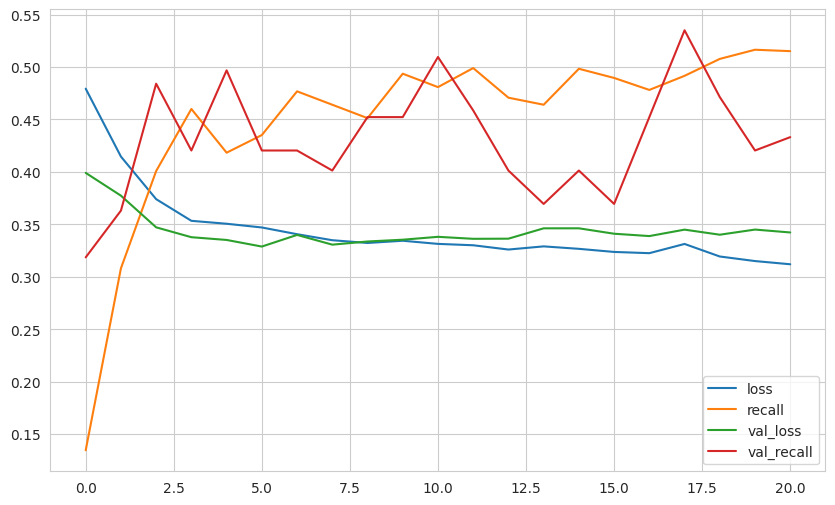

In [ ]:
loss_df_o = pd.DataFrame(model_o.history.history)
loss_df_o.plot()

In [ ]:
loss, recall = model_o.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.34068039059638977
recall:  0.468193382024765


In [ ]:
y_pred = (model_o.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1525   82]
 [ 195  198]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 2ms/step


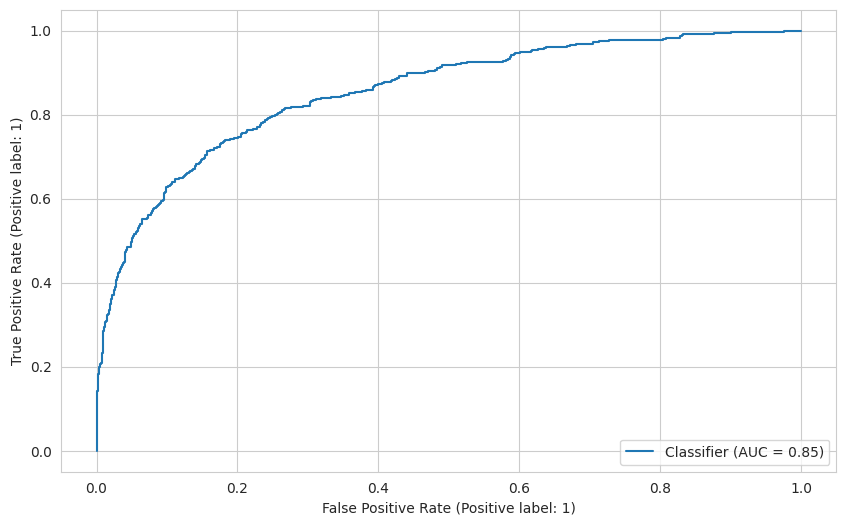

In [ ]:
y_pred_proba = model_o.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8540592921236765

# Here, I make a comparison between the models to take the best one as a final model and save it.

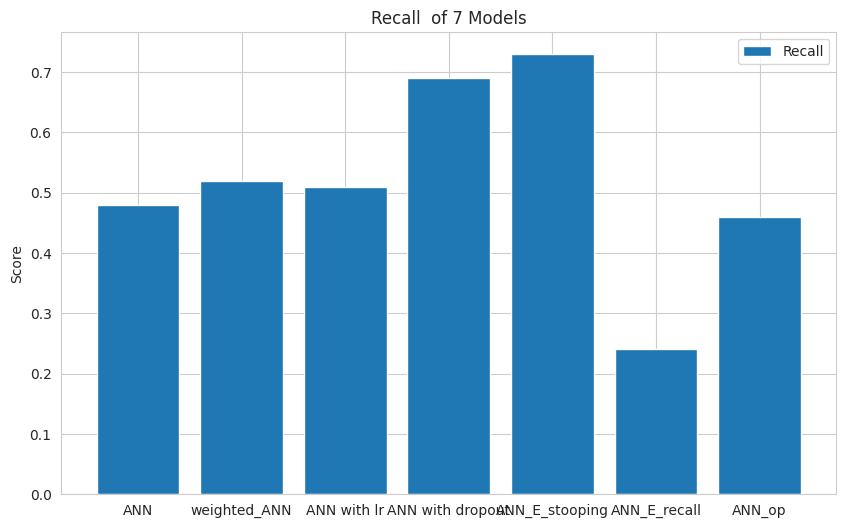

In [149]:
#writing the recalll values for each model
recalls = [0.48, 0.52, 0.51, 0.69, 0.73, 0.24, 0.46]

# Model names
model_names = ["ANN", "weighted_ANN", "ANN with lr", "ANN with dropout", "ANN_E_stooping", "ANN_E_recall", "ANN_op"]
# Create the plot
plt.figure(0)
plt.bar(model_names, recalls, label="Recall")
plt.ylabel("Score")
plt.title("Recall  of 7 Models")
plt.legend()
plt.show()

## As a result, the ANN model with Early stopping (vall_loss) has the best result here. So, let's save the model.

# Final Model and Model Deployment

In [150]:
import pickle

pickle.dump(scaler, open("churn_scaler", "wb"))

In [154]:
loss, recall = model_E.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.436665803194046
recall:  0.7302799224853516


In [155]:
y_pred = model_E.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1313  294]
 [ 106  287]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1607
           1       0.49      0.73      0.59       393

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



In [156]:
model.save("churn_model.h5")

## Loading Model and Scaler

In [157]:
from tensorflow.keras.models import load_model

In [158]:
churn_model = load_model("churn_model.h5")
scaler_churn = pickle.load(open("churn_scaler", "rb"))

## Prediction

In [159]:
churn_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [160]:
single_customer = churn_df.drop("Exited", axis=1).iloc[0:1, :]
single_customer

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42       2    0.000              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1       101348.880             1.000              0.000   

   Geography_Spain  Gender_Female  Gender_Male  
0            0.000          1.000        0.000

In [161]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.64609167,  0.97024255,  0.02188649,  0.99720391, -0.57873591,
        -0.57380915,  1.09598752, -1.09598752]])

In [162]:
(churn_model.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 80ms/step


array([[0]], dtype=int32)

In [163]:
churn_df["Exited"].iloc[0]

1

## **As a result, the model wasn't perfect after all. It needs more enhancements and we must read more research papers to address these limitations.**
# Furthermore, in the beginning, I used 100 epochs then I increased the epoch to 1000. I changed the number of neurons to enhance the results also but I got little increases in the results but not perfect.

In addition, I think increasing the neurons or layers would not solve the problem because we have an overfitting and no need for more complexity!
However, changing some of the parameters will produce a good result.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___